C:\Users\ahmedkk\AppData\Local\Temp\ipykernel_35796\3884505302.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threshold_data["perturb_value"] = pd.Categorical(


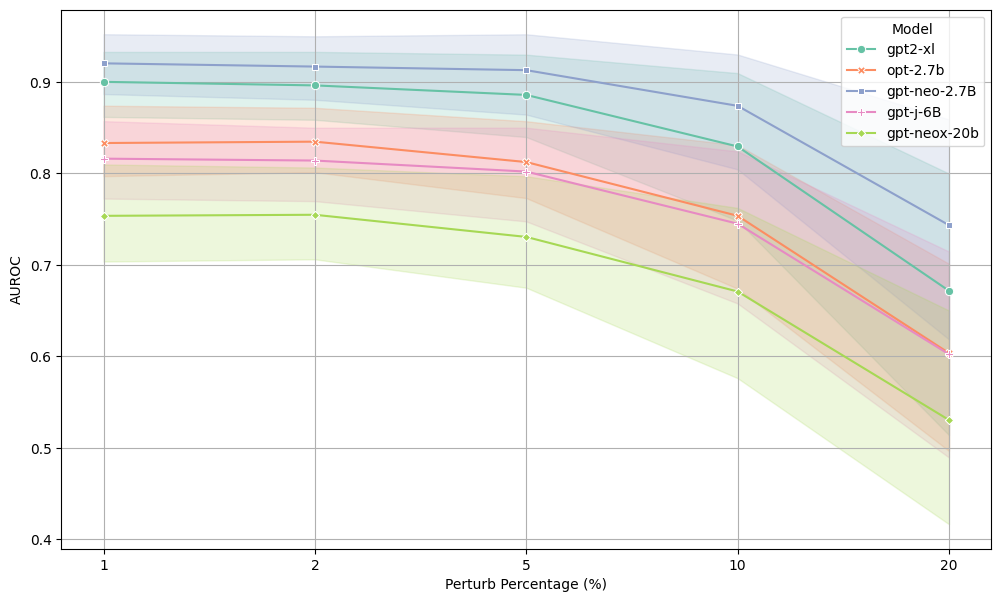

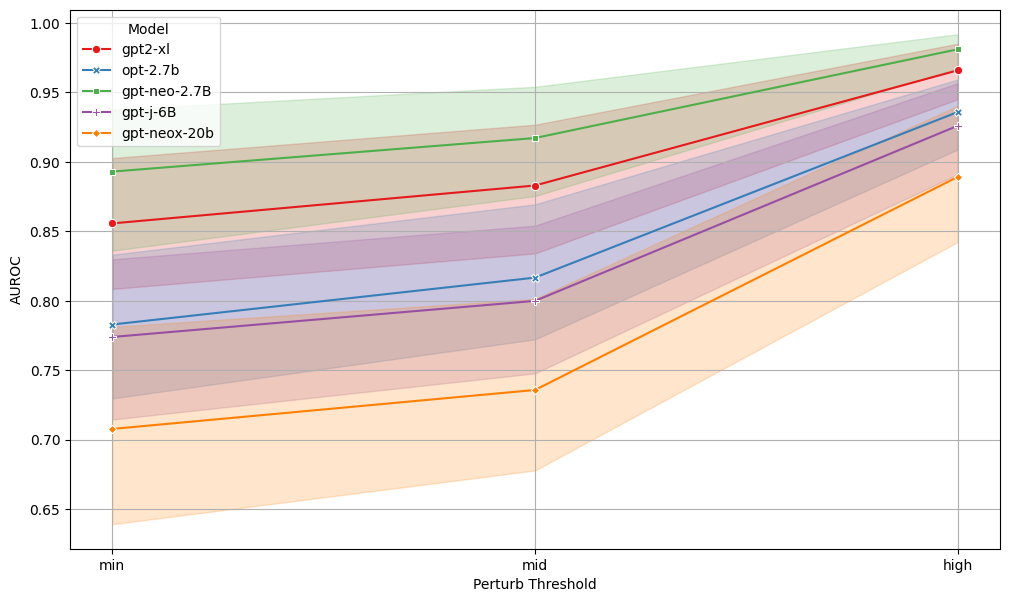

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("exp_main\perturb_word2vec_results.csv")
# df = df[df["env"] == "black"]
# Filter out irrelevant columns
df = df[["env", "dataset", "model", "perturb_name", "perturb_value", "roc_auc"]]

# Split data by perturb_name
percent_data = df[df["perturb_name"] == "perturb_word2vec_percent"]
threshold_data = df[df["perturb_name"] == "perturb_word2vec_threshold"]

# Convert perturb_value for thresholds to categorical for proper ordering
threshold_data["perturb_value"] = pd.Categorical(
    threshold_data["perturb_value"], categories=["min", "mid", "high"], ordered=True
)

# Plot for perturb_word2vec_percent
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=percent_data,
    x="perturb_value",
    y="roc_auc",
    hue="model",
    style="model",
    markers=True,
    dashes=False,
    palette="Set2"
)

# plt.title("Effect of Perturbation Percentage on AUROC")
plt.xlabel("Perturb Percentage (%)")
plt.ylabel("AUROC")
plt.grid(True)
plt.legend(title="Model")
plt.savefig("perturbation_percent_roc_auc.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Plot for perturb_word2vec_threshold
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=threshold_data,
    x="perturb_value",
    y="roc_auc",
    hue="model",
    style="model",
    markers=True,
    dashes=False,
    palette="Set1"
)

# plt.title("Effect of Perturbation Similarity Threshold on AUROC")
plt.xlabel("Perturb Threshold")
plt.ylabel("AUROC")
plt.grid(True)
plt.legend(title="Model")
plt.savefig("perturbation_threshold_roc_auc.pdf", format="pdf", bbox_inches="tight")
plt.show()
